In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import itertools

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
# For grid search
from sklearn.model_selection import GridSearchCV

import functions as fc

plt.rcParams["font.family"] = "Times New Roman"     # Font
plt.rcParams["font.size"] = 12                      # the size of the font
plt.rcParams["xtick.direction"] = "out"             
plt.rcParams["ytick.direction"] = "out"  
plt.rcParams["axes.linewidth"] = 1.0                # the width of the outside line
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (6, 4)

In [36]:
# Load data
dataset = pd.read_csv("all_properties_data.csv")
dataset.head()

,Ti,Nb,Al,Zr,Mo,Sn,Cr,stratify,Mo_Equiavalent,Mo_Equiavalent2,...,Root_Cold_Rolling_Rate,Homonization_Temperature,Homonization_Time,Solution_Treatment_Temperature,Solution_Treatment_Time,Beta_phase,"alpha""_phase",Elongation,UTS,References
0,80.0,20.0,0.0,0,0.0,0.0,0.0,a,0.127414,0.091477,...,9.746794,nd,nd,1173,1800,0,1,40.0,520.0,"Kim, Hee Young, et al. 2004. Materials Transac..."
1,78.0,22.0,0.0,0,0.0,0.0,0.0,a,0.137971,0.099056,...,9.746794,nd,nd,1173,1800,0,1,33.0,560.0,NaN
2,76.0,24.0,0.0,0,0.0,0.0,0.0,a,0.148203,0.106402,...,9.746794,nd,nd,1173,1800,1,1,24.0,455.0,NaN
3,74.0,26.0,0.0,0,0.0,0.0,0.0,a,0.158126,0.113526,...,9.746794,nd,nd,1173,1800,1,1,17.0,425.0,NaN
4,72.0,28.0,0.0,0,0.0,0.0,0.0,a,0.167753,0.120438,...,9.746794,nd,nd,1173,1800,1,0,10.0,525.0,NaN


In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Ti                              107 non-null    float64
 1   Nb                              107 non-null    float64
 2   Al                              107 non-null    float64
 3   Zr                              107 non-null    int64  
 4   Mo                              107 non-null    float64
 5   Sn                              107 non-null    float64
 6   Cr                              107 non-null    float64
 7   stratify                        107 non-null    object 
 8   Mo_Equiavalent                  107 non-null    float64
 9   Mo_Equiavalent2                 107 non-null    float64
 10  Atomic_Number                   107 non-null    float64
 11  e/a                             107 non-null    float64
 12  Average_Atom_Radius             107 

## HyperParameter Tuning for the UTS model

In [38]:
# Split data into x and y based on the feature selection
y = dataset[['UTS']]
X = dataset[['Ti', 'Mo_Equiavalent2', 'Delta', 'Electronegativity', 'Bo', 'Cold_Rolling_Rate']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = dataset['stratify'], test_size=0.2, random_state=2361)

In [39]:
# Implement a gridsearch.
search_params = {
    'n_estimators'      : [5, 10, 20, 30, 50, 100, 300],
    'random_state'      : [2525],
    'n_jobs'            : [1],
    'min_samples_split' : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100],
    'max_depth'         : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100]
}
 
gridsearch_model = GridSearchCV(
    RandomForestRegressor(),
    search_params,
    cv = 3,
    n_jobs = -1,
    verbose=True
)
 
gridsearch_model.fit(X_train, y_train)

# Show a best model.
gridsearch_model.best_estimator_

Fitting 3 folds for each of 700 candidates, totalling 2100 fits


c:\users\ichis\.pyenv\pyenv-win\versions\3.8.2\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestRegressor(max_depth=3, min_samples_split=30, n_estimators=10,
                      n_jobs=1, random_state=2525)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = dataset['stratify'], 
                                                    test_size=0.2, random_state=2361)

rfr_UTS = RandomForestRegressor(n_estimators=10, max_depth = 3,
                            min_samples_split=30,
                            random_state=2525,
                            bootstrap=True)

rfr_UTS.fit(X_train, y_train)

predictions_test = rfr_UTS.predict(X_test)
predictions_train = rfr_UTS.predict(X_train)

r2_train, r2_test, MAE_test, MSE_test, RMSE_test = fc.model_evaluation(rfr_UTS, X_train, X_test, y_train, y_test)

<ipython-input-40-28390bf9b8a7>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_UTS.fit(X_train, y_train)
C:\dev\python\Machine_learning_based_prediction_of_mechanical_properties_of_bTiSMAS\functions.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


<ipython-input-41-dd1f0c984cd4>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


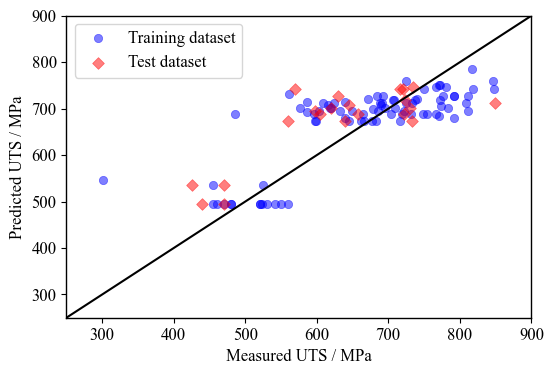

In [41]:
# Create a figure
x = np.linspace(250, 900)
y_diagonal = x

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

line1 = ax.plot(x, y_diagonal, c='black')
scatter2 = ax.scatter(y_train, predictions_train, c='blue', alpha=0.5, edgecolor='blue', linewidths=0.5, label='Training dataset')
scatter1 = ax.scatter(y_test, predictions_test, c='red',marker="D",alpha=0.5, edgecolor='red', linewidths=0.5, label='Test dataset')

ax.set_xlim(250, 900)
ax.set_ylim(250, 900)
ax.legend()
# ax.set_title('Predicted UTS (by LIN) vs. Measured UTS')
ax.set_xlabel('Measured UTS / MPa')
ax.set_ylabel('Predicted UTS / MPa')
# plt.savefig('Random_forest_regression_UTS.png', bbox_inches="tight", pad_inches=0.05)
fig.show()

## HyperParameter Tuning for the Elongation model

In [60]:
# Split data into x and y based on the feature selection
y = dataset[['Elongation']]
X = dataset[['Ti', 'Mo_Equiavalent2', 'Delta', 'Electronegativity', 'Bo', 'Cold_Rolling_Rate']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = dataset['stratify'], test_size=0.2, random_state=2361)

In [61]:
from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gridsearch_model_elongation = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
gridsearch_model_elongation.fit(X_train, y_train)

gridsearch_model_elongation.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\users\ichis\.pyenv\pyenv-win\versions\3.8.2\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = dataset['stratify'], 
                                                    test_size=0.2, random_state=2361)

rfr_elongation = RandomForestRegressor(n_estimators=1400, max_depth = 60,
                            min_samples_split=5, min_samples_leaf=1,
                            max_features="auto", bootstrap=True)

rfr_elongation.fit(X_train, y_train)

predictions_test = rfr_elongation.predict(X_test)
predictions_train = rfr_elongation.predict(X_train)

r2_train, r2_test, MAE_test, MSE_test, RMSE_test = fc.model_evaluation(rfr_elongation, X_train, X_test, y_train, y_test)

<ipython-input-62-495e01ff4fd1>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_elongation.fit(X_train, y_train)
C:\dev\python\Machine_learning_based_prediction_of_mechanical_properties_of_bTiSMAS\functions.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


<ipython-input-63-f3d5b2b98f22>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


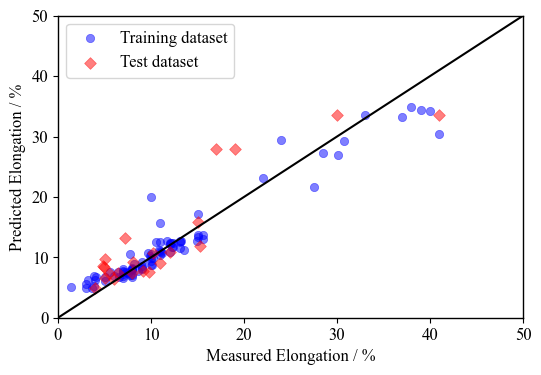

In [63]:
# Create a figure
x = np.linspace(0, 50)
y_diagonal = x

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

line1 = ax.plot(x, y_diagonal, c='black')
scatter2 = ax.scatter(y_train, predictions_train, c='blue', alpha=0.5, edgecolor='blue', linewidths=0.5, label='Training dataset')
scatter1 = ax.scatter(y_test, predictions_test, c='red',marker="D",alpha=0.5, edgecolor='red', linewidths=0.5, label='Test dataset')

ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
ax.legend()
# ax.set_title('Predicted Elongation (by LIN) vs. Measured Elongation')
ax.set_xlabel('Measured Elongation / %')
ax.set_ylabel('Predicted Elongation / %')
# plt.savefig('regression_elongation.png', bbox_inches="tight", pad_inches=0.05)
fig.show()

In [64]:
from joblib import dump, load
dump(rfr_UTS, 'RandomForest_regresssion_UTS.joblib')
dump(rfr_elongation, 'RandomForest_regression_elongation.joblib')

['RandomForest_regression_elongation.joblib']